In [1]:
import os
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Mediapipe Hands setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=True,       # Static images
    max_num_hands=1,              # Only one hand per image
    min_detection_confidence=0.3  # Confidence threshold
)

In [2]:
#ASL dataset
DATA_DIR = "../data"

data = []
labels = []

#visualization
counter = 0
VISUALIZE_EVERY = 100 

Finished class 'A' → 72 samples extracted


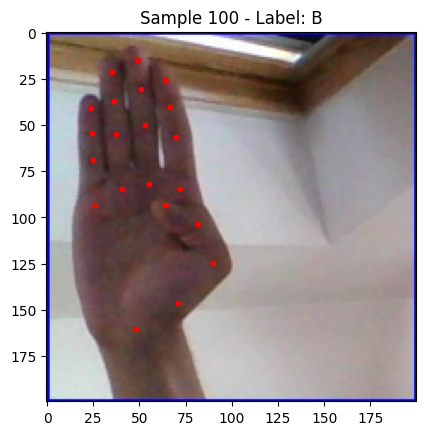

Finished class 'B' → 76 samples extracted


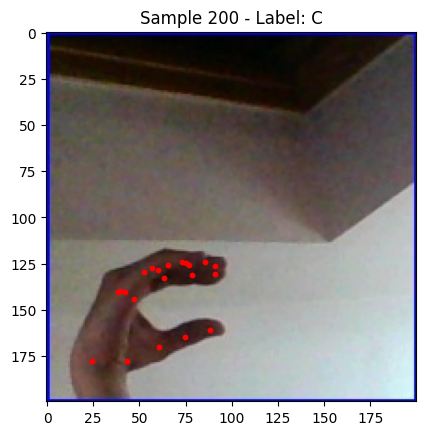

Finished class 'C' → 74 samples extracted


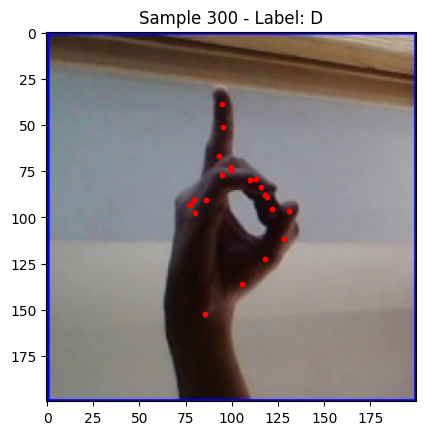

Finished class 'D' → 78 samples extracted
Finished class 'del' → 64 samples extracted


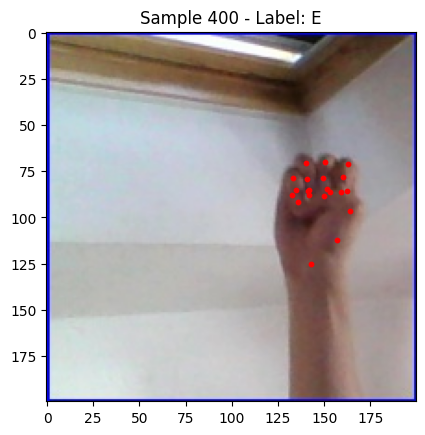

Finished class 'E' → 76 samples extracted


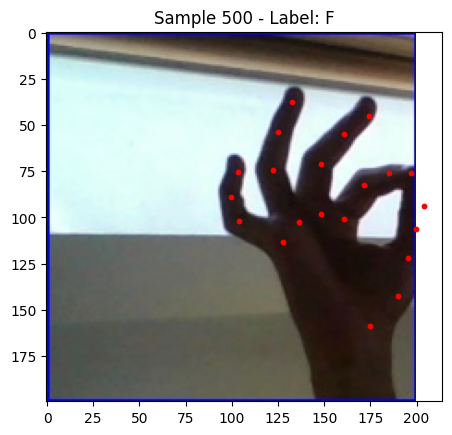

Finished class 'F' → 97 samples extracted


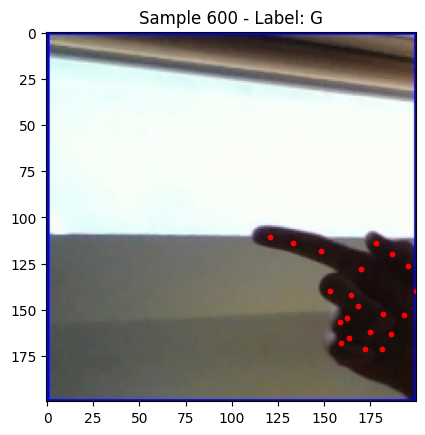

Finished class 'G' → 87 samples extracted


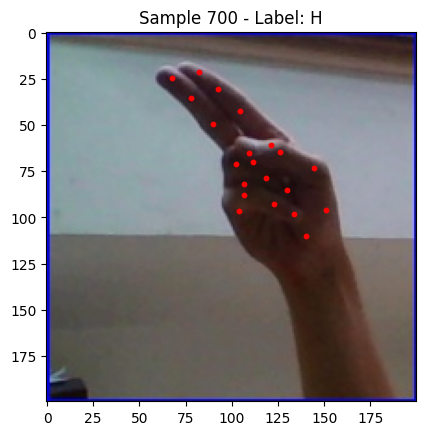

Finished class 'H' → 80 samples extracted
Finished class 'I' → 80 samples extracted


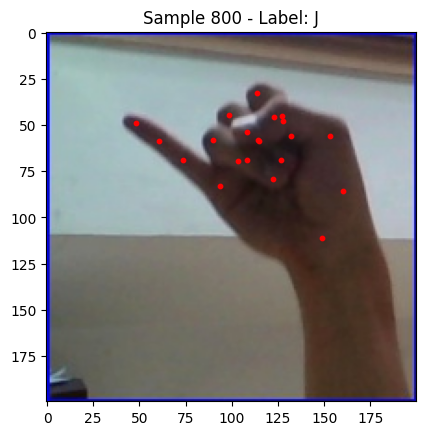

Finished class 'J' → 89 samples extracted


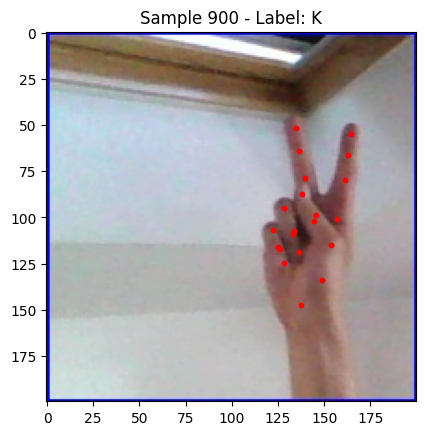

Finished class 'K' → 93 samples extracted


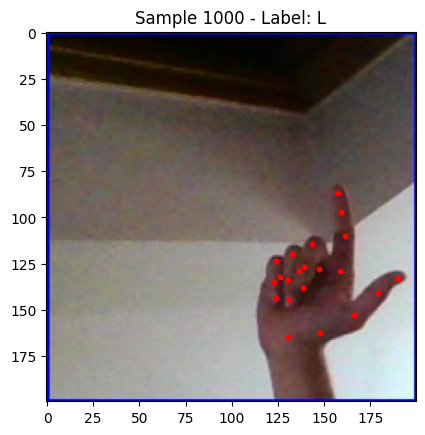

Finished class 'L' → 81 samples extracted


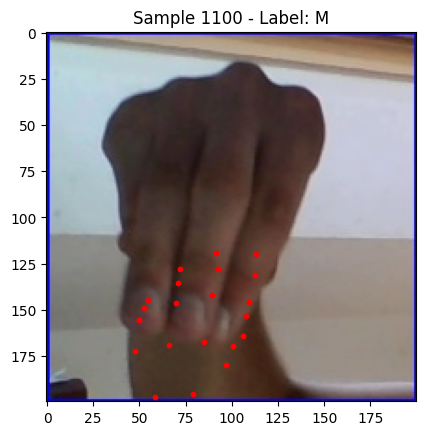

Finished class 'M' → 55 samples extracted
Finished class 'N' → 44 samples extracted
Finished class 'nothing' → 0 samples extracted


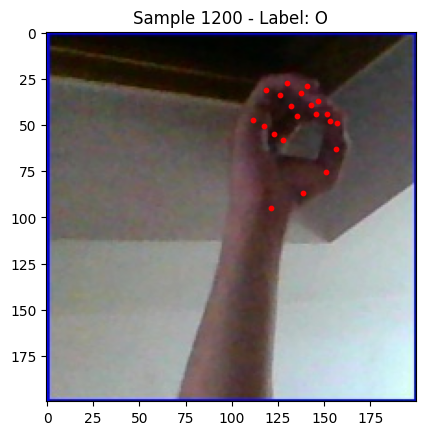

Finished class 'O' → 78 samples extracted
Finished class 'P' → 70 samples extracted


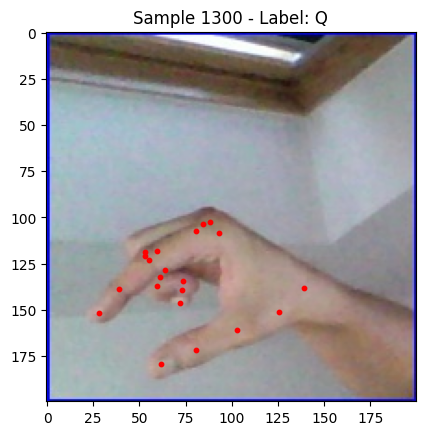

Finished class 'Q' → 71 samples extracted


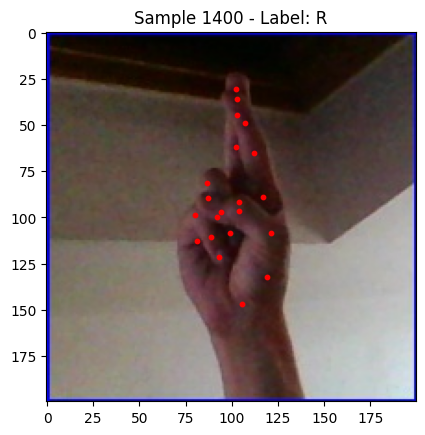

Finished class 'R' → 85 samples extracted


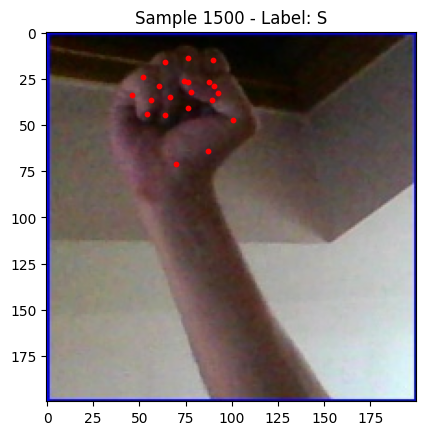

Finished class 'S' → 90 samples extracted


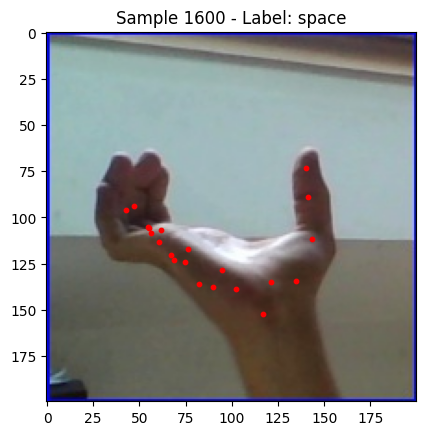

Finished class 'space' → 64 samples extracted
Finished class 'T' → 80 samples extracted


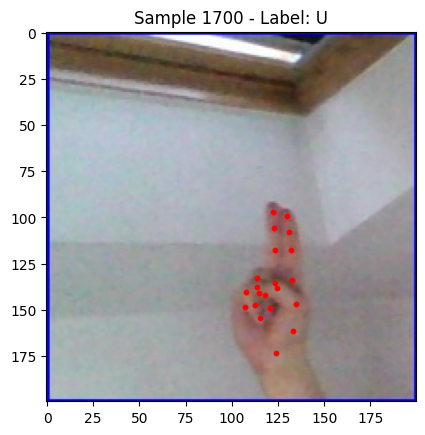

Finished class 'U' → 91 samples extracted


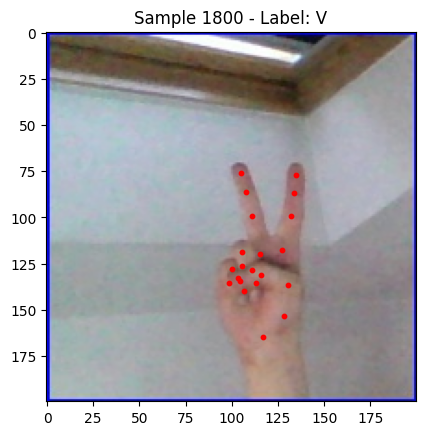

Finished class 'V' → 94 samples extracted


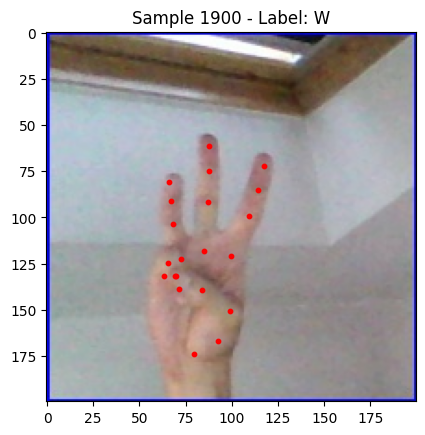

Finished class 'W' → 78 samples extracted


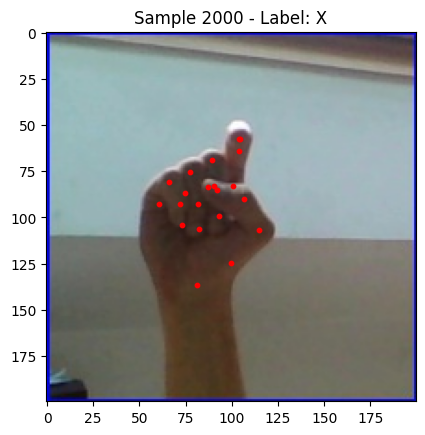

Finished class 'X' → 74 samples extracted


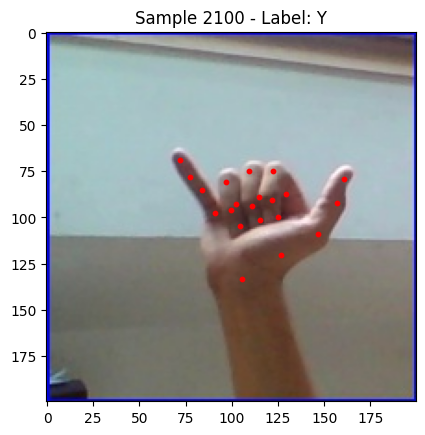

Finished class 'Y' → 85 samples extracted
Finished class 'Z' → 74 samples extracted

Done! Total samples saved: 2180 into asl_keypoints_dataset.pickle


In [3]:
# Loop over each class
for label in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, label)

    if not os.path.isdir(folder_path):
        continue

    class_count = 0  

    # Loop over each image in that folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue  

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:  
            hand_landmarks = results.multi_hand_landmarks[0]

            # Extract 21 (x, y) keypoints
            keypoints = []
            for lm in hand_landmarks.landmark:
                keypoints.append(lm.x) 
                keypoints.append(lm.y)  

            data.append(keypoints)  
            labels.append(label)    
            class_count += 1

            # Visualize every Nth image
            counter += 1
            if counter % VISUALIZE_EVERY == 0:
                plt.imshow(img_rgb)
                xs = [lm.x * img.shape[1] for lm in hand_landmarks.landmark]
                ys = [lm.y * img.shape[0] for lm in hand_landmarks.landmark]
                plt.scatter(xs, ys, c='red', s=10)
                plt.title(f"Sample {counter} - Label: {label}")
                plt.show()

    
    print(f"Finished class '{label}' → {class_count} samples extracted", flush=True)

# Save dataset
with open("../asl_keypoints_dataset.pickle", "wb") as f:
    pickle.dump({"data": data, "labels": labels}, f)

print(f"\nDone! Total samples saved: {len(data)} into asl_keypoints_dataset.pickle")
